{'Sent': [14209], 'Opens': [1434], 'Individual Opens': [918]} {'subject_line': 'Partner with us for Black Friday Savings', 'company': 'Community Fibre'}
Partner with us for Black Friday Savings 40
['#f0a900', '#36447f', '#f0a900', '#36447f', '#f0a900', '#36447f', '#f0a900', '#36447f']


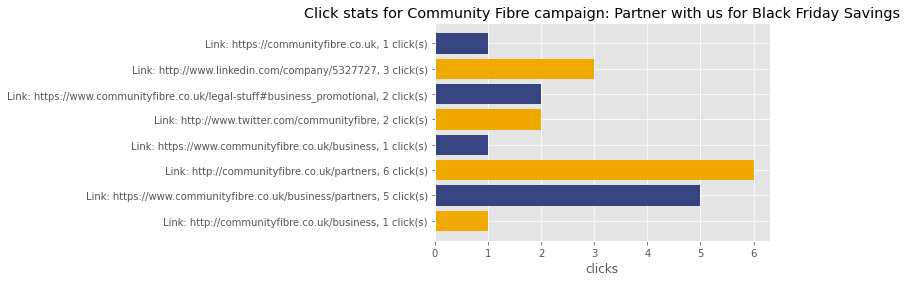

In [1]:
from math import inf
import os
import requests as req
from bs4 import BeautifulSoup
import pandas as pd
import glob
from datetime import timedelta
from datetime import date
import datetime
import matplotlib.pyplot as plt 
import csv
import shutil
import numpy as np

plt.style.use('ggplot')



username = None
company = 'bpl'
stats_url = 'https://bpl.circdata-solutions.co.uk/Fusion/Dynamail/MailshotDetails.aspx?id=65a4ecc4-e45f-453d-b18e-edc0caf66530'

clients = {
    'Union Street': ['#00509f', '#e6aaaa'],
    'Akixi': ['#035496', '#efc52f'],
    'Fibre Provider': ['#ef7b2f', '#1f2937'],
    'Managed Services': ['#e8653f','#2d2d2d'],
    'Comms Dealer Weekly': ['#274083','#b2b2b8'],
    'Jola':['#009fe3','#000000'],
    'NEOS':['#31968c','#dc7f3a'],
    'Neos Networks':['#31968c','#dc7f3a'],
    'ITE Weekly': ['#003b6a','#5d9fbc'],
    'Nuvias':['#2a6c88','#f6c576'],
    'Evolve IP':['#f47920','#0451a1'],
    'CN awards': ['#000', '#0000FF'],
    'Comms Vision': ['#00b6fe', '#064563'],
    'Community Fibre': ['#f0a900', '#36447f'],
    'Viegli': ['#0086c8', '#fff']
}

handicap = 1

abbreviation = None

credentials ={
    'ite': {
        'password':None,
         'url': 'https://iteuropa.circdata-solutions.co.uk/Fusion/login.aspx',
         '__VIEWSTATE' : '/wEPDwUKMTgwMjQwMDI5M2Rksovo2zHemSveuJw8vAuQ6Xf8InA=',
         '__EVENTVALIDATION' : '/wEWBQKPgenHBQLj+sxGAuOoubQBAqqg8cUOAteSgYoCZ204OWUV6uw8bUTN6GYNlbZWM7E=',
        'bot_links':['https://www.iteuropa.com/privacy-policy?ref=email_footer', 'https://www.iteuropa.com/communication-preferences?email=[CD|emailaddress|]','https://www.iteuropa.com/?utm_source=newsletter&utm_medium=email&utm_campaign=weekly&utm_content=pixel','mailto:clients@ite-mail1.com', 'http://www.iteuropa.com', 'https://www.iteuropa.com?ref=email_footer','http://www.iteuropa.com/?q=privacy-policy','http://www.iteuropa.com/','http://www.iteuropa.com/communication-preferences?email=[CD|emailaddress|]']
        },
    'bpl':  {
        'password':None, 
        'url': 'https://bpl.circdata-solutions.co.uk/Fusion/login.aspx',
        '__VIEWSTATE':'/wEPDwUKMTgwMjQwMDI5M2Rk2e1SYhd3ZcfIKWr+jOok9jgKqtU=',
        '__EVENTVALIDATION':'/wEWBQLV2djbAQLj+sxGAuOoubQBAqqg8cUOAteSgYoC7owPjxk9TLLjh/iR0zoJPMA+4Yk=',
        'bot_links':['http://www.bpl-business.com','https://www.bpl-business.com', 'http://www.bpl-business.com/privacy-policy.shtml','https://www.bpl-business.com/privacy-policy','mailto:weeklynews@bpl-mail1.co.uk','https://www.fibreprovider.net/?utm_source=newsletter&utm_medium=email&utm_campaign=weekly&utm_content=pixel']
        
}
}

def clear_directories():
    shutil.rmtree(f'{os.getcwd()}\\company')
    shutil.rmtree(f'{os.getcwd()}\\pixels')

def isBannedCharacter(character):
    if ord(character) >= 128:
        return True

def remove_characters(string):
    unallowed = ['#', '<', '>', '%', '&', '{', '}', '/', '$', '!', '\'', '\"', ':', '@','*','?','\\','+','+','`','|','=','–' ]
    sanitised_string =''
    for character in range(len(string)):
        if not string[character] in unallowed and not isBannedCharacter(string[character]):
            sanitised_string = sanitised_string + string[character]
    return sanitised_string


def analysis_and_visualisation(company, subject_line, colours, generic_df, handicap, abbrv=None):
    
    if len(subject_line) > 50:
        subject_line = subject_line[:50] + '(...)'
    print(subject_line, len(subject_line))
    year = date.today().year
    month = date.today().month
    day = date.today().day
    time_stamp = f"{day}-{month}-{year}"

    path = os.getcwd()
    pixels_path = path + "\\pixels"
    company_path = path + "\\company"

    pixel_files = glob.glob(os.path.join(pixels_path, "*.csv"))
    comp_files = glob.glob(os.path.join(company_path, "*.csv"))

    df_comp = pd.concat((pd.read_csv(file,encoding = "ISO-8859-1", parse_dates=[1,2,4],index_col=False) for file in comp_files), ignore_index=True)
    
    if len(pixel_files)>0:
        df_px = pd.concat((pd.read_csv(file, encoding = "ISO-8859-1", parse_dates=[1,2,4],index_col=False) for file in pixel_files), ignore_index=True)
        df = df_comp[~df_comp.Email.isin(df_px.Email)].reset_index(drop=True)
    else:
        df = df_comp
    
    #grab all files
    #########################################################################################################


    #########################################################################################################

    if df.empty:
        end=''
        print('dataframe is empty - no clicks')
        return None
    else:
    
        #Remove pixel emails from the main dataframe
        #########################################################################################################


        listed_columns = list(df.columns)
        df.drop(df.columns[listed_columns.index('BounceDate'):], axis=1, inplace=True)
     

        #########################################################################################################

        df['Company'] = df.apply(lambda row: row.Email.split('@')[1][: row.Email.split('@')[1].index('.')], axis=1) 
        
        #Here we are adding a new column 'company' that will let us track bot companies
        #########################################################################################################


        df['name'] = df.apply(lambda row: row.Email.split('@')[0].lower(), axis=1) 
        df['Bot_Likelihood'] = 0
        unwanted_companies = ['bpl-business', 'iteuropa', 'gmail', 'hotmail']
        df = df[~df.Company.isin(unwanted_companies).reset_index(drop=True)]
        fake_people = ['info', 'sales', 'marketing', 'operations','hello','contact', 'enquiries', 'accounts', 'comms']
        if handicap < 2:
            fake_people = []
        df = df[~df.name.isin(fake_people)].reset_index(drop=True)


        time_data = {}
        company_trends = {}

        for person in df.Email:
            clicks = df[df.Email == person].LinkClickedDate.reset_index(drop =True)
            Open_Send_Sum = df[df.Email == person].OpenedDate - df[df.Email == person].SentDate

            company_search = df[df.Email == person].Company.values[0]
            if not company_search in company_trends:
                company_trends[company_search]=[]
            company_trends[company_search].append(Open_Send_Sum.values[0] / np.timedelta64(1, 's'))
            time_data[person] = clicks
    
        
        for company_x in company_trends:
            company_data = company_trends[company_x]
            deviation=np.std(company_data)/np.mean(company_data)
            company_trends[company_x]=deviation
            if deviation < 0.6 and len(company_data) > len(comp_files) :
                includes_bad_company = df.index[df['Company'] == company_x].tolist()
                for index in includes_bad_company:
                    df.at[index, 'Bot_Likelihood'] = (3/5)
        
        #########################################################################################################

        
        #get clickers that clicked too quickly
        bots = []
        bot_companies = []
        number_of_links = len(comp_files)
        allowance = 0.75
        if number_of_links > 5:
            allowance = allowance * number_of_links ** - (1/8)
         


        for clicker in time_data:
            botness = df[df.Email == clicker].Bot_Likelihood.reset_index(drop=True)[0]
            clicks = list(time_data[clicker])
            clicks.sort()
            clicker_index = df.index[df['Email'] == clicker].tolist()
            
            failed = {
                'click_gap': False,
                'many_links':False,
                'many_links_short_gap':False
            }


            too_soon = timedelta(seconds=handicap)
            shortest_time = timedelta(seconds=-1)

            length = len(clicks)
        
            if length:
                for i in range(length-1):
                    gap = clicks[i+1]- clicks[i]
                
                    if (gap > shortest_time and gap <= too_soon):
                        failed['click_gap'] = True

                        comp = df[df.Email == clicker].Company.reset_index(drop=True)[0] 
                        if not comp in bot_companies:
                            bot_companies.append(comp)
            
                percentage_clicks = length / number_of_links
                if percentage_clicks > allowance:
                    failed['many_links'] = True
                    for i in range(length -1):
                        gap = clicks[i+1] - clicks[i]
                        if (gap > shortest_time and gap <= timedelta(seconds=5)):
                            failed['many_links_short_gap'] = True

            if failed['click_gap']:
                botness+=(2/3)
            if failed['many_links']:
                botness += (1/4)
            if failed['many_links_short_gap']:
                botness += (1/4)


            for index in clicker_index:
                df.at[index, 'Bot_Likelihood'] = botness
        
        for x in bot_companies:
            bad_by_association = df.index[df['Company'] == x].tolist()
            for index in bad_by_association:
                new_rating = df.iloc[index].Bot_Likelihood + (1/6)
                df.at[index, 'Bot_Likelihood'] = new_rating

        sanitised = df[df.Bot_Likelihood < (1/3) ].reset_index(drop=True)
        sanitised_columns = list(sanitised.columns)
        product_csv =  sanitised.drop(sanitised.columns[sanitised_columns.index('Company'):], axis=1)

        ##make holding directories

        parent_dir = f"{os.getcwd()}\\Completed_Reports"
        dir_path = f"{os.getcwd()}\\Completed_Reports\\{company}"

        dir_exists = os.path.isdir(dir_path)

        if not dir_exists:
            os.mkdir(dir_path)
        os.mkdir(f"{os.getcwd()}\\Completed_Reports\\{company}\\{subject_line}")
        dir_path = f"{os.getcwd()}\\Completed_Reports\\{company}\\{subject_line}"
            
        df.to_csv(f"{dir_path}\\bot-analysis-{subject_line}.csv",index=False)
        product_csv.to_csv(f"{dir_path}\\{subject_line}-clickStats.csv",index=False)
        sanitised.to_csv(f"{dir_path}\\who_passed_{subject_line}.csv",index=False)
        generic_df.to_csv(f'{dir_path}\\{subject_line}-genericStats.csv', index=False)

        links = {}
        for link in sanitised.LinkUrl:
            if link in links:
                links[link] +=1
            else:
                links[link] =1


        links_Y = []
        links_Xticks = []
        color_scheme =[]
        colors = colours
        index = 0



        for x in links:
            
            if abbrv:
                label = x[:x.index(f'{abbrv}')]
            else: 
                label =x
            links_Xticks.append(f"Link: {label}, {links[x]} click(s)")
            links_Y.append(links[x])
            if index % 2 ==0:
                color_scheme.append(colors[0])
            else:
                color_scheme.append(colors[1])
            index +=1

        if (len(links)<2):
            links_Xticks.append(f"No other links clicked")
            links_Y.append(0)
            color_scheme.append(colors[1])


        print(color_scheme)
        plt.barh(links_Xticks, links_Y, color=color_scheme)
        plt.title(f'Click stats for {company} campaign: {subject_line}')
        plt.xlabel('clicks')
        plt.savefig(f"{dir_path}\\{subject_line}-ecast-stats.pdf", bbox_inches = 'tight')
        plt.show()


def get_basic_info(company, stats_url):

    ## Login to dynamail
    webpage_response = req.get(credentials[company]['url'])
    webpage = webpage_response.content

     ##login input fields

    login_creds = {
        'ctl00$CPHP$newloginControl$tbUsername': username,
        'ctl00$CPHP$newloginControl$tbPassword': credentials[company]['password'],
        'ctl00$CPHP$newloginControl$loginButton': 'Login',
        '__VIEWSTATEGENERATOR': '5E82A05A',
        '__VIEWSTATE': credentials[company]['__VIEWSTATE'],
        '__EVENTVALIDATION': credentials[company]['__EVENTVALIDATION'],
    }

    session = req.session()
    res = session.post(credentials[company]['url'], data=login_creds)


    ####################################################################
    #   Go to specific url#######
    stats_page = session.get(stats_url)
    stats_page_soup = BeautifulSoup(stats_page.content, 'html.parser')


    generic_stats ={
        'Sent': [0],
        'Opens':[0],
        'Individual Opens':[0]
    }

    client_info = {
        'subject_line': '',
        'company':''
    }


    ####get total_Sent
    labels = stats_page_soup.find_all(attrs={'class':'Label'})

    for x in labels:

        if(x.string.find('Emails') > 0):   
            generic_stats['Sent'][0] = int(x.parent.find_all('td')[1].find('a').string)
        if(x.string.find('Subject') > 0):
            client_info['subject_line'] = x.parent.find_all('td')[1].string
        if(x.string.find('Campaign') > 0):
            client_info['company'] = x.parent.find_all('td')[1].find('a').string
        

    ##### get opened and unique opens
    unique_opens_img = stats_page_soup.find('img', attrs={'id': 'ctl00_CPHP_mailshotCharts_EmailsByStatusChart_Chart1'}).parent.find_all('area')[1].attrs['title']
    unique_opens = int(unique_opens_img[unique_opens_img.index('- ')+1:])
    generic_stats['Individual Opens'][0] = unique_opens

    overall_opens = int(stats_page_soup.find('span', attrs={'id':'ctl00_CPHP_mailshotCharts_OpenedEmailsLabel'}).find('b').text)
    generic_stats['Opens'][0] = overall_opens

    ### santise subject line and subject_line
    start_slice = inf
    end_slice = None
    for x in client_info['subject_line']:
        if(x != ' ' and x !='\n' and x != '\r\n' and x != '\r'):
            end_slice = client_info['subject_line'].rindex(x)
            if(client_info['subject_line'].index(x) < start_slice):
                start_slice = client_info['subject_line'].index(x)
    client_info['subject_line'] = remove_characters(client_info['subject_line'][start_slice:end_slice+1])


    ### santise company and subject_line
    start_slice = inf
    end_slice = None
    for x in client_info['company']:
        if(x != ' ' and x !='\n' and x != '\r\n' and x != '\r'):
            end_slice = client_info['company'].rindex(x)
            if(client_info['company'].index(x) < start_slice):
                start_slice = client_info['company'].index(x)
    client_info['company'] = remove_characters(client_info['company'][start_slice:end_slice+1])

    generic_df = pd.DataFrame(generic_stats)
    
    

    print(generic_stats, client_info)

    clicks_table = stats_page_soup.find('table', attrs={'class':'PlainTable'}).find_all('tr')

    individual_clicks = {
        'pixels':[],
        'company':[]
    }
    for index in range(1, len(clicks_table)):
        row = clicks_table[index]
        sections = row.find_all('td')
        
        link_clicked = sections[1]
        link_clicked_href = link_clicked.find('a').get('href')

        click_stats_link = sections[2].find('a').get('href')


        
        if link_clicked_href in credentials[company]['bot_links']:
            if not click_stats_link in individual_clicks['pixels']:
                individual_clicks['pixels'].append(click_stats_link)
        else:
            if not click_stats_link in individual_clicks['company']:
                individual_clicks['company'].append(click_stats_link)

    os.mkdir(f'{os.getcwd()}\\company')
    os.mkdir(f'{os.getcwd()}\\pixels')
    for index in range(len(individual_clicks['pixels'])):
        link = individual_clicks['pixels'][index]
        click_stats_res = session.get(link)
        click_stats_page = BeautifulSoup(click_stats_res.content, 'html.parser')
        form = click_stats_page.find('form')
        inputs = form.find_all('input')
        input_dictionary={}
        for x in inputs:
           name= x.get('name')
           value = x.get('value')
           if(name != None and not name in input_dictionary):
            input_dictionary[name]=value
        csv_data = session.post(link, data=input_dictionary)
        newFile = open(f'{os.getcwd()}\\pixels\\Recipients({index}).csv', 'w', newline='')
        newFile.write(csv_data.text)
        newFile.close()

    for index in range(len(individual_clicks['company'])):
        link = individual_clicks['company'][index]
        click_stats_res = session.get(link)
        click_stats_page = BeautifulSoup(click_stats_res.content, 'html.parser')
        form = click_stats_page.find('form')
        inputs = form.find_all('input')
        input_dictionary={}
        for x in inputs:
           name= x.get('name')
           value = x.get('value')
           if(name != None and not name in input_dictionary):
            input_dictionary[name]=value
        csv_data = session.post(link, data=input_dictionary)
        newFile = open(f'{os.getcwd()}\\company\\Recipients({index}).csv', 'w', newline='')
        newFile.write(csv_data.text)
        newFile.close()


    ##run analysis
    if client_info['company'] in clients:
        analysis_and_visualisation(subject_line=client_info['subject_line'], company=client_info['company'], colours=clients[client_info['company']], generic_df=generic_df, handicap=handicap, abbrv=abbreviation)
    else:
        print(f'To run analysis please provide colours for the company: {client_info["company"]}')
get_basic_info(company, stats_url=stats_url)
clear_directories()